In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
print(f"Rows in dataset: {len(df):,}")

Rows in dataset: 1,338


In [4]:
X = df.drop(columns=["charges"])
y = df["charges"]

In [5]:
num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

In [6]:
model = Pipeline([
    ("prep", preprocess),
    ("lr", LinearRegression())
])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Test R²: {r2:.3f}") 

Test R²: 0.784


In [8]:
ohe = model.named_steps["prep"].named_transformers_["cat"]
feature_names = list(ohe.get_feature_names_out(cat_cols)) + num_cols

coefs = model.named_steps["lr"].coef_
coef_df = pd.DataFrame({"feature": feature_names, "coef": coefs})
coef_df["abs_coef"] = coef_df["coef"].abs()

In [9]:
top = coef_df.sort_values("abs_coef", ascending=False).head(10)
print("\nTop factors (by |coef|):")
print(top[["feature", "coef"]].to_string(index=False))


Top factors (by |coef|):
         feature         coef
      smoker_yes 23651.128856
region_southwest  -809.799354
region_southeast  -657.864297
        children   425.278784
region_northwest  -370.677326
             bmi   337.092552
             age   256.975706
        sex_male   -18.591692


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


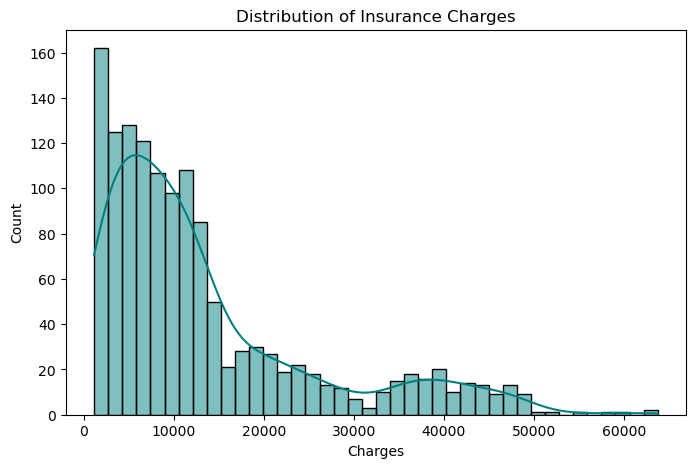

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=40, kde=True, color='teal')
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

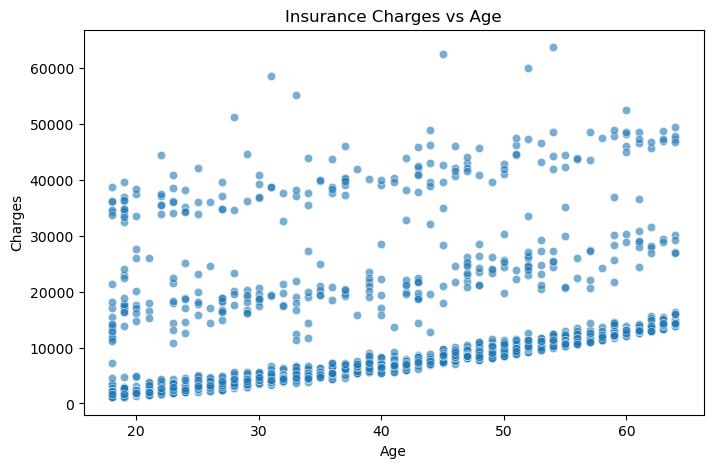

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='charges', alpha=0.6)
plt.title("Insurance Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

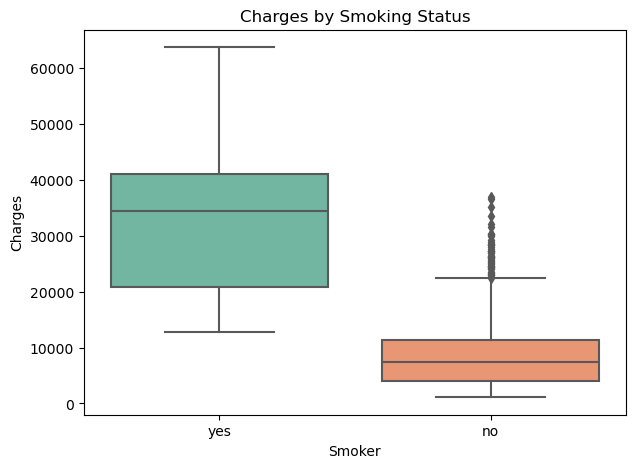

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
plt.title("Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

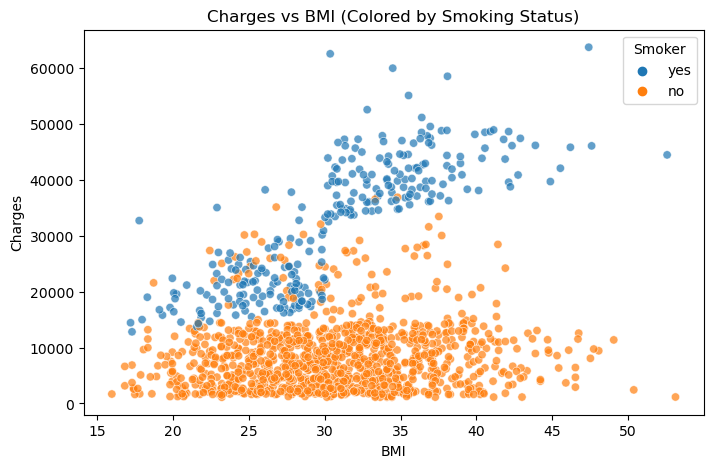

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title("Charges vs BMI (Colored by Smoking Status)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend(title="Smoker")
plt.show()

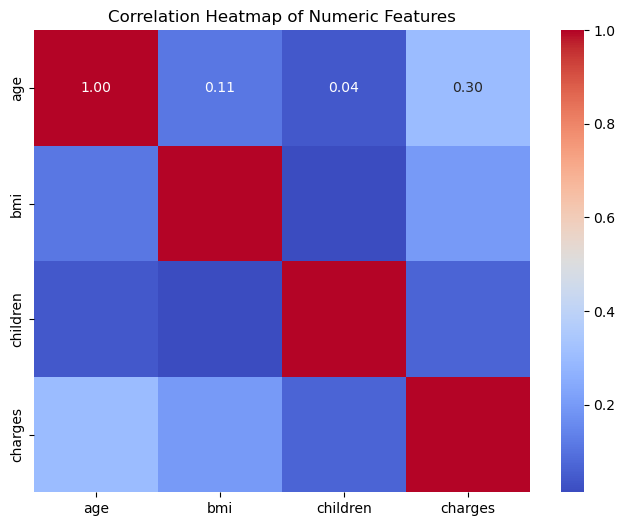

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()